<a href="https://colab.research.google.com/github/sugey-gi/edp1/blob/main/Graficasympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verificación de Sturm–Liouville:
p(x) = e^{2x} > 0, sigma(x) = e^{2x} > 0, q(x) = 0 (continua)
Condiciones de frontera: f(0) = 0, f(1) = 0 (homogéneas)
⇒ Es un problema de Sturm–Liouville regular

Coeficientes c_n:
n = 1, c_n = 1.273240
n = 2, c_n = 0.000000
n = 3, c_n = 0.424413
n = 4, c_n = -0.000000
n = 5, c_n = 0.254648
n = 6, c_n = 0.000000
n = 7, c_n = 0.181891


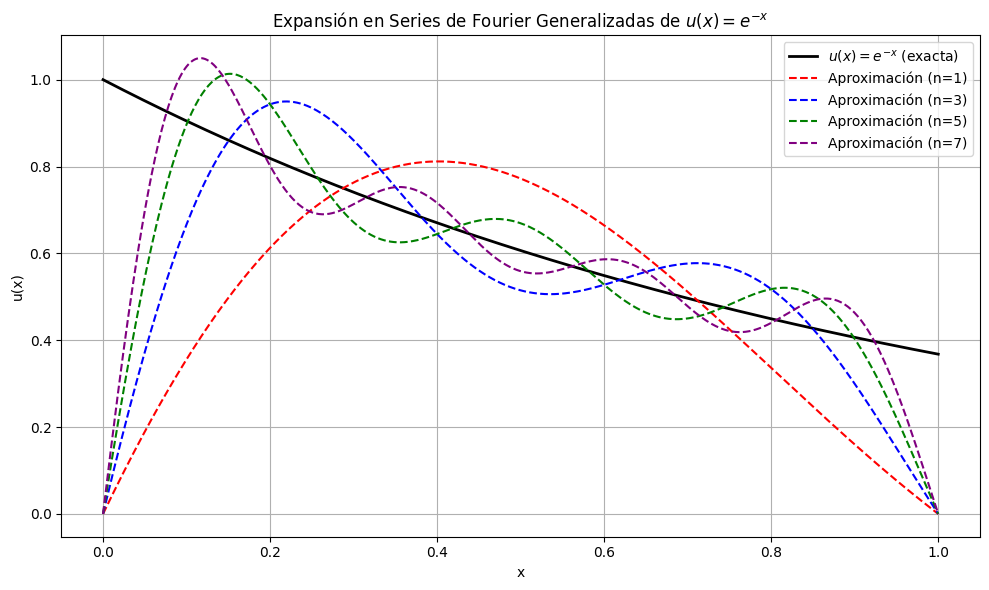

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, exp

# =======================
# Verificación de Sturm–Liouville
# =======================

# La ecuación dada es: f'' + 2f' + λf = 0, 0 < x < 1, con f(0) = 0, f(1) = 0
# Multiplicamos por el factor integrante μ(x) = e^{∫2dx} = e^{2x}
# Se convierte en: (e^{2x}f')' + λ e^{2x} f = 0
# Forma de Sturm-Liouville: (p(x)f')' + q(x)f + λσ(x)f = 0
p = lambda x: np.exp(2 * x)  # p(x) = e^(2x)
q = lambda x: 0              # q(x) = 0
sigma = lambda x: np.exp(2 * x)  # σ(x) = e^(2x)

print("Verificación de Sturm–Liouville:")
print("p(x) = e^{2x} > 0, sigma(x) = e^{2x} > 0, q(x) = 0 (continua)")
print("Condiciones de frontera: f(0) = 0, f(1) = 0 (homogéneas)")
print("⇒ Es un problema de Sturm–Liouville regular\n")

# =======================
# Definiciones del problema
# =======================

# Eigenvalores: λ_n = 1 + (nπ)^2
def eigenvalue(n):
    return 1 + (n * pi)**2

# Eigenfunciones: φ_n(x) = e^{-x} sin(nπx)
def eigenfunction(n, x):
    return np.exp(-x) * np.sin(n * pi * x)

# Función a expandir: u(x) = e^{-x}
def u(x):
    return np.exp(-x)

# =======================
# Coeficientes c_n con peso σ(x) = e^{2x}
# =======================

def coef_cn(n):
    """
    Calcula el coeficiente c_n para la expansión en series de Fourier generalizadas.
    c_n = ∫ u(x) φ_n(x) σ(x) dx / ∫ [φ_n(x)]^2 σ(x) dx
    """
    # Numerador: ∫_0^1 u(x) φ_n(x) σ(x) dx
    num_integrand = lambda x: u(x) * eigenfunction(n, x) * sigma(x)
    num = quad(num_integrand, 0, 1)[0]

    # Denominador: ∫_0^1 [φ_n(x)]^2 σ(x) dx
    den_integrand = lambda x: eigenfunction(n, x)**2 * sigma(x)
    den = quad(den_integrand, 0, 1)[0]

    return num / den

# =======================
# Construcción de la serie
# =======================

# Parámetros
N = 7  # Número de términos para la serie (usaremos hasta n=7 para graficar diferentes aproximaciones)
x_vals = np.linspace(0, 1, 500)  # Puntos para graficar
u_exact = u(x_vals)  # Valores exactos de u(x)

# Aproximaciones para diferentes cantidades de términos
u_approx_n1 = np.zeros_like(x_vals)
u_approx_n3 = np.zeros_like(x_vals)
u_approx_n5 = np.zeros_like(x_vals)
u_approx_n7 = np.zeros_like(x_vals)
coef_list = []

# Calcular coeficientes y construir la serie
for n in range(1, N + 1):
    cn = coef_cn(n)
    coef_list.append((n, cn))

    # Acumular términos para diferentes aproximaciones
    if n <= 1:
        u_approx_n1 += cn * eigenfunction(n, x_vals)
    if n <= 3:
        u_approx_n3 += cn * eigenfunction(n, x_vals)
    if n <= 5:
        u_approx_n5 += cn * eigenfunction(n, x_vals)
    u_approx_n7 += cn * eigenfunction(n, x_vals)

# =======================
# Mostrar coeficientes
# =======================

print("Coeficientes c_n:")
for n, cn in coef_list:
    print(f"n = {n}, c_n = {cn:.6f}")

# =======================
# Gráfica
# =======================

plt.figure(figsize=(10, 6))
plt.plot(x_vals, u_exact, label=r'$u(x) = e^{-x}$ (exacta)', lw=2, color='black')
plt.plot(x_vals, u_approx_n1, '--', label='Aproximación (n=1)', lw=1.5, color='red')
plt.plot(x_vals, u_approx_n3, '--', label='Aproximación (n=3)', lw=1.5, color='blue')
plt.plot(x_vals, u_approx_n5, '--', label='Aproximación (n=5)', lw=1.5, color='green')
plt.plot(x_vals, u_approx_n7, '--', label='Aproximación (n=7)', lw=1.5, color='purple')
plt.title('Expansión en Series de Fourier Generalizadas de $u(x) = e^{-x}$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()